# Problem Statement 1:

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing Dataset

In [618]:
df = pd.read_csv('data.csv')

In [619]:
df.head()

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [620]:
df.shape

(100, 3)

In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   F                        100 non-null    float64
 1   N                        100 non-null    float64
 2   Prprice per square foot  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [622]:
df.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [623]:
df.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

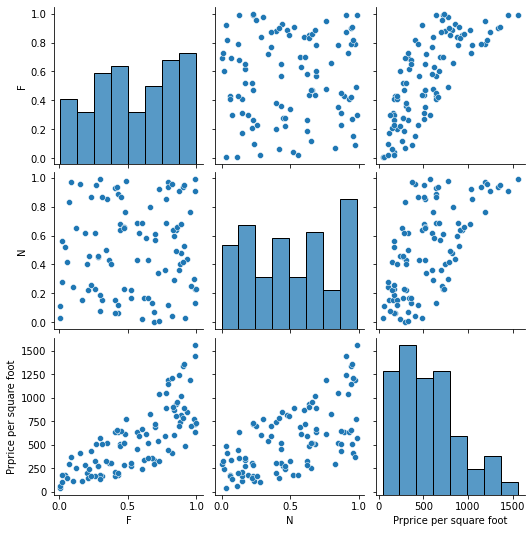

In [625]:
sns.pairplot(df)

In [626]:
# Independent and Dependent variables

X = df.iloc[:,:-1].values

y = df.iloc[:,-1].values

In [627]:
X.shape , y.shape

((100, 2), (100,))

In [628]:
#Train and Test Data

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [629]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((67, 2), (33, 2), (67,), (33,))

### Multiple Linear Regression Model Building

In [630]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [631]:
y_pred = reg.predict(X_test)
y_pred

array([ 422.81092199,   47.3117882 ,  673.47663105,   57.68448711,
        653.51497592,  228.41131427,  586.76861722,  572.31598687,
        677.55656248,  701.96695506,  754.89073698,  978.30316384,
       1061.45374137, 1160.50910794,  523.60276016,  395.42701601,
        992.49454662,  106.29015537,  896.38962812,  703.96467422,
        422.44211598,  170.43180667,  275.77994073,  845.07169401,
       1085.62595172, -247.14204568,  994.10039444,  657.07241222,
        733.93022227,  937.96491688,  897.62666993,  814.10728639,
        728.26750836])

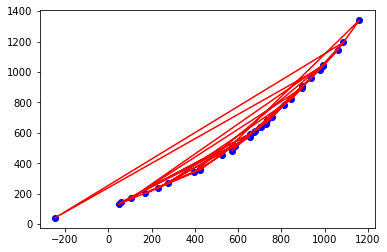

In [632]:
plt.scatter(y_pred,y_test,color='blue')
plt.plot(y_pred,y_test,color='red')

1 = 180.38

2 = 1312.07

3 = 440.13

4 = 343.72

In [633]:
reg.predict([[0.34,0.68]])

array([483.02633098])

In [634]:
reg.predict([[0.33,0.19]])

array([147.60419658])

In [635]:
from sklearn import metrics as sm

In [636]:
# Model Performance
print("Regressor model performance:")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred), 2))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, y_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2))

Regressor model performance:
Mean absolute error(MAE) = 64.79
Mean squared error(MSE) = 6893.9
Median absolute error = 63.21
Explain variance score = 0.94


### Polynomial Regression Model Building

In [637]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
lg1 = LinearRegression()
lg1.fit(X_poly,y_train)

LinearRegression()

In [638]:
y_pred1 = lg1.predict(poly_reg.fit_transform(X_test))
y_pred1

array([ 359.75976199,  131.68218142,  610.25321634,  149.21839813,
        565.70476871,  237.32776414,  520.95984491,  484.01063981,
        620.99264658,  631.87647431,  704.04970819, 1027.89797017,
       1151.40826113, 1331.94059362,  461.42089638,  341.20348876,
       1042.75661496,  170.30867277,  904.41563338,  635.41490761,
        362.40482444,  204.12101516,  266.88411561,  831.11222225,
       1205.59511066,   41.00053444, 1039.87078205,  595.13955572,
        687.50938689,  965.50286138,  905.63644023,  787.83921136,
        659.7042353 ])

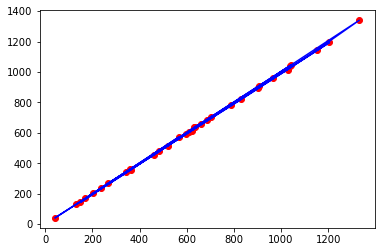

In [639]:
plt.scatter(y_pred1,y_test,color='red')
plt.plot(y_pred1,y_test,color='blue')

### Conclusion
1. I have used Multiple Linear regression model and Polynomial Regression model. As I have plotted scatter-plot for these two models , it is seen that Polynomial regression model gives best regression line. 
2. Almost all the points are on the regression line,hence Polynomial regression model is best to decide "price per square foot" .

3. Hence, for these DataSet ,Polynomial Regression model is more accurate than Multiple Linear regression model

# Problem Statement 2

### Importing Dataset

In [1]:
data = {'Id':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
'Age':['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
'Income':['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
'Gender':['Male','Male','Male','Male','Female','Female','Female','Male','Female','Female','Female','Male','Female','Male'],
'MaritalStatus':['Single','Married','Single','Single','Single','Married','Married','Single','Married','Single','Married','Married','Single','Married'],
'Buys':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']}

In [5]:
df2 = pd.DataFrame(data,columns=['Id','Age','Income','Gender','MaritalStatus','Buys'])

In [6]:
df2 = df2.drop('Id', axis=1)

In [7]:
df2.head()

,Age,Income,Gender,MaritalStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            14 non-null     object
 1   Income         14 non-null     object
 2   Gender         14 non-null     object
 3   MaritalStatus  14 non-null     object
 4   Buys           14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [9]:
df2.shape

(14, 5)

In [10]:
df2.describe()

,Age,Income,Gender,MaritalStatus,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


In [11]:
df2["Buys"].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In [648]:
df2.isnull().sum()

Age              0
Income           0
Gender           0
MaritalStatus    0
Buys             0
dtype: int64

In [649]:
# Preprocessing

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df2.apply(le.fit_transform)
df2

,Age,Income,Gender,MaritalStatus,Buys
0,1,0,1,1,0
1,1,0,1,0,0
2,0,0,1,1,1
3,2,2,1,1,1
4,2,1,0,1,1
5,2,1,0,0,0
6,0,1,0,0,1
7,1,2,1,1,0
8,1,1,0,0,1
9,2,2,0,1,1


In [650]:
#Independent and Dependent variables

X = df2.iloc[:,:-1].values

y = df2.iloc[:,-1].values

In [651]:
#Train and Test Data

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.3,random_state=0)

In [652]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4, 4), (10, 4), (4,), (10,))

### Descision Tree Model Building

In [653]:
#Model Building

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy' , random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [654]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [655]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

#Confusion Matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[1, 2],
       [2, 5]], dtype=int64)

In [656]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.71      0.71      0.71         7

    accuracy                           0.60        10
   macro avg       0.52      0.52      0.52        10
weighted avg       0.60      0.60      0.60        10



In [657]:
classifier.predict([[0,0,1,1]])

array([1])

In [658]:
classifier.predict([[1,1,0,0]])

array([0])

### Conclusion
1. Root Node for the decision tree is 'Age'

2. Predicted class for input [Age>21 , Income = Low , Gender = Female , Marital Status = Married] i. e. [1,1,0,0] is No[0]

3. The accuracy for this model is 60%.